In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time

startInstantTime = time.time()

In [2]:
#Parametros de ejecucion del programa
nombreArchivoDataset = "DatasetClasificacion.csv"
nombreArchivoInformacion = "InformacionEjercicioClasificacion.txt"
numeroDimensiones = 3
nombreClase1 = "Clase 1"
nombreClase2 = "Clase 2"
numeroMuestrasClase1 = 1250
numeroMuestrasClase2 = 1000
listaMinimoValorPuntosPorCoordenadas = [-20.0] * numeroDimensiones
listaMaximoValorPuntosPorCoordenadas = [20.0] * numeroDimensiones
margenMinimoSeparacionEntreClases = 3.5
listaCoeficientesPrincipalesHiperplanoBase = [1.0] * numeroDimensiones
coeficienteInterceptoHiperplanoBase = -5.0

colorTextoVerde = (35, 155, 86)

In [3]:
def printColouredText(text, foregroundColor = (0, 0, 0), backgroundColor = (255, 255, 255)):
    return "\033[48;2;{};{};{}m\033[38;2;{};{};{}m{}\033[38;2;0;0;0m\033[48;2;255;255;255m".format(backgroundColor[0], backgroundColor[1], backgroundColor[2], foregroundColor[0], foregroundColor[1], foregroundColor[2], text)

#La distancia con signo (ignorando el valor absoluto involucrado en la formula de distancia de un punto a un hiperplano) permite saber la distancia ademas de si el punto se encuentra por encima o por debajo del hiperplano
def calcularDistanciaConSignoPuntoAHiperplano(listaCoeficientesHiperplano, punto):
    numeroDimensionesEspacio = len(listaCoeficientesHiperplano) - 1
    return (np.dot(listaCoeficientesHiperplano[0:numeroDimensionesEspacio], punto) + listaCoeficientesHiperplano[numeroDimensionesEspacio]) / np.linalg.norm(listaCoeficientesHiperplano[0:numeroDimensionesEspacio])

def generarListaPuntosClasificados(listaCoeficientesHiperplanoSeparacion, nombreClase1, nombreClase2, numeroMuestrasClase1, numeroMuestrasClase2, listaMinimoValorPorCoordenadas, listaMaximoValorPorCoordenadas, margenMinimoSeparacionEntreClases = 1.0):
    numeroDimensionesEspacio = len(listaCoeficientesHiperplanoSeparacion) - 1
    listaPuntosMuestra = []
    puntosMuestraPorClases = {nombreClase1: [], nombreClase2: []}
    
    #Se generan los puntos de la primera clase (Se tienen como restricciones que esten a distancia del hiperplano mayor al margen y este por encima del hiperplano, ademas que el punto no se repita)
    for indice1 in range(numeroMuestrasClase1):
        puntoMuestraValido = False
        while puntoMuestraValido == False:
            puntoGenerado = []
            for indice2 in range(numeroDimensionesEspacio):
                puntoGenerado += list(np.random.uniform(low = listaMinimoValorPorCoordenadas[indice2], high = listaMaximoValorPorCoordenadas[indice2], size = 1))
            distanciaPuntoHiperplano = calcularDistanciaConSignoPuntoAHiperplano(listaCoeficientesHiperplanoSeparacion, puntoGenerado)
            if distanciaPuntoHiperplano > margenMinimoSeparacionEntreClases and puntoGenerado not in puntosMuestraPorClases[nombreClase1]:
                listaPuntosMuestra.append(puntoGenerado)
                puntosMuestraPorClases[nombreClase1].append(puntoGenerado)
                puntoMuestraValido = True
    
    #Se generan los puntos de la segunda clase (Se tienen como restricciones que esten a distancia del hiperplano mayor al margen y este por debajo del hiperplano, ademas que el punto no se repita)
    for indice in range(numeroMuestrasClase2):
        puntoMuestraValido = False
        while puntoMuestraValido == False:
            puntoGenerado = []
            for indice2 in range(numeroDimensionesEspacio):
                puntoGenerado += list(np.random.uniform(low = listaMinimoValorPorCoordenadas[indice2], high = listaMaximoValorPorCoordenadas[indice2], size = 1))
            distanciaPuntoHiperplano = calcularDistanciaConSignoPuntoAHiperplano(listaCoeficientesHiperplanoSeparacion, puntoGenerado)
            if distanciaPuntoHiperplano < -margenMinimoSeparacionEntreClases and puntoGenerado not in puntosMuestraPorClases[nombreClase2]:
                listaPuntosMuestra.append(puntoGenerado)
                puntosMuestraPorClases[nombreClase2].append(puntoGenerado)
                puntoMuestraValido = True
    return listaPuntosMuestra, puntosMuestraPorClases

def obtenerListasCoordenadasRespectivas(listaPuntos, numeroDimensiones):
    diccionarioPuntosPorCoordenadas = {}
    for indice in range(numeroDimensiones):
        diccionarioPuntosPorCoordenadas[indice] = []
        
    for puntoActual in listaPuntos:
        for indice in range(numeroDimensiones):
            coordenadaActual = puntoActual[indice]
            diccionarioPuntosPorCoordenadas[indice].append(coordenadaActual)
    return diccionarioPuntosPorCoordenadas

In [4]:
listaCoeficientesHiperplanoBase = listaCoeficientesPrincipalesHiperplanoBase + [coeficienteInterceptoHiperplanoBase]

#Esta parte se puede comentar si no se desea que los coeficientes del hiperplano de separacion sean aleatorios sino fijos
listaCoeficientesHiperplanoBase = list(np.random.uniform(low = -1.0, high = 1.0, size = numeroDimensiones + 1))
while listaCoeficientesHiperplanoBase[0:numeroDimensiones] == [0.0] * numeroDimensiones:
    listaCoeficientesHiperplanoBase = list(np.random.uniform(low = -1.0, high = 1.0, size = numeroDimensiones + 1))

listaPuntosMuestra, puntosMuestraPorClases = generarListaPuntosClasificados(listaCoeficientesHiperplanoBase, nombreClase1, nombreClase2, numeroMuestrasClase1, numeroMuestrasClase2, listaMinimoValorPuntosPorCoordenadas, listaMaximoValorPuntosPorCoordenadas, margenMinimoSeparacionEntreClases = margenMinimoSeparacionEntreClases)

In [5]:
etiquetaCoordenadaPuntos = "x"
etiquetaPuntos = "X"
nombreColumnaPunto = "Punto"
nombreColumnaClaseAsignada = "Categoría"

#Construccion del dataframe: Definicion de la estructura
informacionDatasetGenerado = {}
for indice in range(numeroDimensiones):
    nombreColumnaActual = "Coordenada $" + etiquetaCoordenadaPuntos + "_{" + str(indice + 1) + "}$"
    informacionDatasetGenerado[nombreColumnaActual] = []
informacionDatasetGenerado[nombreColumnaPunto] = []
informacionDatasetGenerado[nombreColumnaClaseAsignada] = []

#Construccion del dataframe: Se agregan los registros
for nombreClaseActual in puntosMuestraPorClases.keys():
    for punto in puntosMuestraPorClases[nombreClaseActual]:
        informacionDatasetGenerado[nombreColumnaPunto].append(punto)
        for indice in range(numeroDimensiones):
            nombreColumnaActual = "Coordenada $" + etiquetaCoordenadaPuntos + "_{" + str(indice + 1) + "}$"
            informacionDatasetGenerado[nombreColumnaActual].append(punto[indice])
        informacionDatasetGenerado[nombreColumnaClaseAsignada].append(nombreClaseActual)
datasetGenerado = pd.DataFrame(informacionDatasetGenerado)

#Construccion del dataframe: Indexacion de filas (Esta parte es opcional)
listaIndicesFilas = []
for indice in range(numeroMuestrasClase1 + numeroMuestrasClase2):
    nombreFilaActual = "$" + etiquetaPuntos + "_{" + str(indice + 1) + "}$"
    listaIndicesFilas.append(nombreFilaActual)
datasetGenerado.index = listaIndicesFilas

datasetGenerado.to_csv(nombreArchivoDataset, index = True, encoding = 'utf-8')
display(datasetGenerado)

,Coordenada $x_{1}$,Coordenada $x_{2}$,Coordenada $x_{3}$,Punto,Categoría
$X_{1}$,-18.765605,2.696875,14.823128,"[-18.76560522575144, 2.696874964275601, 14.823...",Clase 1
$X_{2}$,17.502861,-14.415908,8.711794,"[17.50286117581379, -14.415908027750186, 8.711...",Clase 1
$X_{3}$,-19.123904,-4.784207,0.152211,"[-19.123904447068373, -4.784207272114372, 0.15...",Clase 1
$X_{4}$,-16.168418,-19.722345,8.785886,"[-16.16841805735414, -19.722344942300797, 8.78...",Clase 1
$X_{5}$,13.906484,-16.997398,18.920485,"[13.906483906895112, -16.997398279310726, 18.9...",Clase 1
...,...,...,...,...,...
$X_{2246}$,-17.673648,13.988377,15.642207,"[-17.673647729717196, 13.988377238310939, 15.6...",Clase 2
$X_{2247}$,19.096050,6.479219,-13.954474,"[19.096049770248975, 6.47921917135691, -13.954...",Clase 2
$X_{2248}$,6.928761,4.845285,11.174871,"[6.928760543266307, 4.845284833529316, 11.1748...",Clase 2
$X_{2249}$,-11.348394,18.215467,4.951216,"[-11.348394328569128, 18.215467169937682, 4.95...",Clase 2


<IPython.core.display.Javascript object>


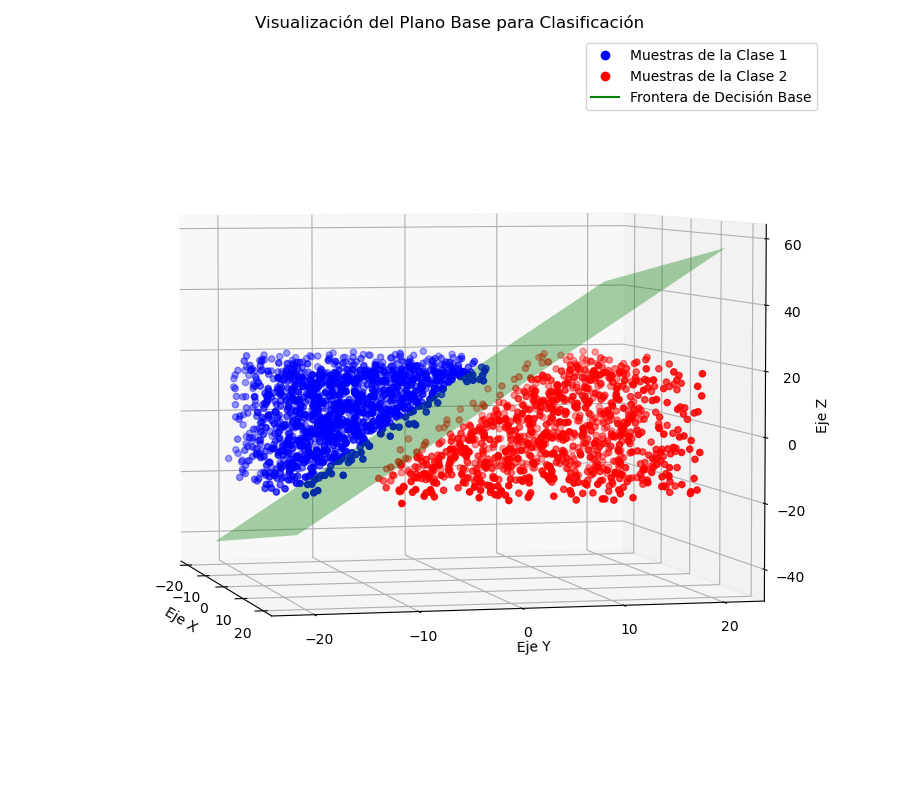

/tmp/ipykernel_49624/2192575809.py:81: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = currentFigure.gca(projection = '3d')


In [6]:
%matplotlib notebook

listaPuntosClase1PorCoordenadasRespectivas = obtenerListasCoordenadasRespectivas(puntosMuestraPorClases[nombreClase1], numeroDimensiones)
listaPuntosClase2PorCoordenadasRespectivas = obtenerListasCoordenadasRespectivas(puntosMuestraPorClases[nombreClase2], numeroDimensiones)
valoresCoordenadasXPuntosClase1 = listaPuntosClase1PorCoordenadasRespectivas[0]
valoresCoordenadasXPuntosClase2 = listaPuntosClase2PorCoordenadasRespectivas[0]
valoresCoordenadasYPuntosClase1 = None
valoresCoordenadasYPuntosClase2 = None
valoresCoordenadasZPuntosClase1 = None
valoresCoordenadasZPuntosClase2 = None
minimoEjeX = np.min(valoresCoordenadasXPuntosClase1 + valoresCoordenadasXPuntosClase2) - 1
maximoEjeX = np.max(valoresCoordenadasXPuntosClase1 + valoresCoordenadasXPuntosClase2) + 1
minimoEjeY = None
maximoEjeY = None
minimoEjeZ = None
maximoEjeZ = None

numeroMuestrasHiperplanoClasificacion = 10
if numeroDimensiones == 1:
    valoresCoordenadasYPuntosClase1 = [0.0] * len(listaPuntosClase1PorCoordenadasRespectivas[0])
    valoresCoordenadasYPuntosClase2 = [0.0] * len(listaPuntosClase2PorCoordenadasRespectivas[0])
    
    plt.figure(num = 1, figsize = (9, 3))
    plt.plot(valoresCoordenadasXPuntosClase1, valoresCoordenadasYPuntosClase1, 'bo', label = "Muestras de la Clase 1")
    plt.plot(valoresCoordenadasXPuntosClase2, valoresCoordenadasYPuntosClase2, 'ro', label = "Muestras de la Clase 2")
    plt.axvline(x = -listaCoeficientesHiperplanoBase[numeroDimensiones] / listaCoeficientesHiperplanoBase[numeroDimensiones - 1], color = 'g', linestyle = '-', label = "Frontera de Decisión Base", linewidth = 2.5)
    plt.legend(loc = 'upper left')
    plt.xlabel("Eje X")
    plt.ylabel("")
    plt.gca().get_yaxis().set_visible(False)
    plt.title("Visualización de la Recta Base para Clasificación")
    plt.grid(True)
    plt.show()
elif numeroDimensiones == 2:
    valoresCoordenadasYPuntosClase1 = listaPuntosClase1PorCoordenadasRespectivas[1]
    valoresCoordenadasYPuntosClase2 = listaPuntosClase2PorCoordenadasRespectivas[1]
    minimoEjeY = np.min(valoresCoordenadasYPuntosClase1 + valoresCoordenadasYPuntosClase2) - 1
    maximoEjeY = np.max(valoresCoordenadasYPuntosClase1 + valoresCoordenadasYPuntosClase2) + 1
    
    listaValoresCoordenadaXHiperplanoBase = np.linspace(minimoEjeX, maximoEjeX, num = numeroMuestrasHiperplanoClasificacion)
    listaValoresCoordenadaYHiperplanoBase = np.linspace(minimoEjeY, maximoEjeY, num = numeroMuestrasHiperplanoClasificacion)
    if listaCoeficientesHiperplanoBase[numeroDimensiones - 1] != 0.0:
        listaValoresCoordenadaYHiperplanoBase = -(listaCoeficientesHiperplanoBase[numeroDimensiones - 2] * listaValoresCoordenadaXHiperplanoBase + listaCoeficientesHiperplanoBase[numeroDimensiones]) / listaCoeficientesHiperplanoBase[numeroDimensiones - 1]
    elif listaCoeficientesHiperplanoBase[numeroDimensiones - 2] != 0.0:
        listaValoresCoordenadaXHiperplanoBase = [-listaCoeficientesHiperplanoBase[numeroDimensiones] / listaCoeficientesHiperplanoBase[numeroDimensiones - 2]] * numeroMuestrasHiperplanoClasificacion

    plt.figure(num = 1, figsize = (9, 8))
    plt.plot(valoresCoordenadasXPuntosClase1, valoresCoordenadasYPuntosClase1, 'bo', label = "Muestras de la Clase 1")
    plt.plot(valoresCoordenadasXPuntosClase2, valoresCoordenadasYPuntosClase2, 'ro', label = "Muestras de la Clase 2")
    plt.plot(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase, 'g-', label = "Frontera de Decisión Base")
    plt.legend(loc = 'upper left')
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.title("Visualización de la Recta Base para Clasificación")
    plt.grid(True)
    plt.show()
elif numeroDimensiones == 3:
    valoresCoordenadasYPuntosClase1 = listaPuntosClase1PorCoordenadasRespectivas[1]
    valoresCoordenadasYPuntosClase2 = listaPuntosClase2PorCoordenadasRespectivas[1]
    valoresCoordenadasZPuntosClase1 = listaPuntosClase1PorCoordenadasRespectivas[2]
    valoresCoordenadasZPuntosClase2 = listaPuntosClase2PorCoordenadasRespectivas[2]
    minimoEjeY = np.min(valoresCoordenadasYPuntosClase1 + valoresCoordenadasYPuntosClase2) - 1
    maximoEjeY = np.max(valoresCoordenadasYPuntosClase1 + valoresCoordenadasYPuntosClase2) + 1
    minimoEjeZ = np.min(valoresCoordenadasZPuntosClase1 + valoresCoordenadasZPuntosClase2) - 1
    maximoEjeZ = np.max(valoresCoordenadasZPuntosClase1 + valoresCoordenadasZPuntosClase2) + 1

    listaValoresCoordenadaXHiperplanoBase = np.linspace(minimoEjeX, maximoEjeX, num = numeroMuestrasHiperplanoClasificacion)
    listaValoresCoordenadaYHiperplanoBase = np.linspace(minimoEjeY, maximoEjeY, num = numeroMuestrasHiperplanoClasificacion)
    listaValoresCoordenadaZHiperplanoBase = np.linspace(minimoEjeZ, maximoEjeZ, num = numeroMuestrasHiperplanoClasificacion)
    if listaCoeficientesHiperplanoBase[numeroDimensiones - 1] != 0.0:
        listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase = np.meshgrid(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase)
        listaValoresCoordenadaZHiperplanoBase = -(listaCoeficientesHiperplanoBase[numeroDimensiones - 3] * listaValoresCoordenadaXHiperplanoBase + listaCoeficientesHiperplanoBase[numeroDimensiones - 2] * listaValoresCoordenadaYHiperplanoBase + listaCoeficientesHiperplanoBase[numeroDimensiones]) / listaCoeficientesHiperplanoBase[numeroDimensiones - 1]
    elif listaCoeficientesHiperplanoBase[numeroDimensiones - 2] != 0.0:
        listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaZHiperplanoBase = np.meshgrid(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaZHiperplanoBase)
        listaValoresCoordenadaYHiperplanoBase = -(listaCoeficientesHiperplanoBase[numeroDimensiones - 3] * listaValoresCoordenadaXHiperplanoBase + listaCoeficientesHiperplanoBase[numeroDimensiones]) / listaCoeficientesHiperplanoBase[numeroDimensiones - 2]
    elif listaCoeficientesHiperplanoBase[numeroDimensiones - 3] != 0.0:
        listaValoresCoordenadaYHiperplanoBase, listaValoresCoordenadaZHiperplanoBase = np.meshgrid(listaValoresCoordenadaYHiperplanoBase, listaValoresCoordenadaZHiperplanoBase)
        listaValoresCoordenadaXHiperplanoBase = [-listaCoeficientesHiperplanoBase[numeroDimensiones] / listaCoeficientesHiperplanoBase[numeroDimensiones - 3]] * numeroMuestrasHiperplanoClasificacion
    
    currentFigure = plt.figure(num = 1, figsize = (9, 8))
    ax = currentFigure.gca(projection = '3d')
    ax.view_init(elev = 4, azim = -14)
    ax.scatter(valoresCoordenadasXPuntosClase1, valoresCoordenadasYPuntosClase1, valoresCoordenadasZPuntosClase1, c = 'b', marker = 'o')
    etiquetaLeyendaPuntosClase1 = mpl.lines.Line2D([0], [0], linestyle = "none", c = 'b', marker = 'o')
    ax.scatter(valoresCoordenadasXPuntosClase2, valoresCoordenadasYPuntosClase2, valoresCoordenadasZPuntosClase2, c = 'r', marker = 'o')
    etiquetaLeyendaPuntosClase2 = mpl.lines.Line2D([0], [0], linestyle = "none", c = 'r', marker = 'o')
    ax.plot_surface(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase, listaValoresCoordenadaZHiperplanoBase, color = 'g', alpha = 0.35)
    etiquetaLeyendaPlano = mpl.lines.Line2D([0], [0], linestyle = "-", c = 'g')
    ax.set_xlabel("Eje X")
    ax.set_ylabel("Eje Y")
    ax.set_zlabel("Eje Z")
    ax.set_title("Visualización del Plano Base para Clasificación")
    ax.legend([etiquetaLeyendaPuntosClase1, etiquetaLeyendaPuntosClase2, etiquetaLeyendaPlano], ["Muestras de la Clase 1", "Muestras de la Clase 2", "Frontera de Decisión Base"], numpoints = 1)
    plt.tight_layout()
    plt.show()

In [7]:
outputStream = open(nombreArchivoInformacion, "w")
outputStream.write(str(numeroDimensiones) + "\n")
outputStream.write(nombreClase1 + "\n")
outputStream.write(nombreClase2 + "\n")
outputStream.write(str(listaCoeficientesHiperplanoBase) + "\n")
outputStream.write(etiquetaCoordenadaPuntos + "\n")
outputStream.write(nombreColumnaClaseAsignada + "\n")
outputStream.close()
print("Se ha generado el archivo", printColouredText(nombreArchivoInformacion, colorTextoVerde), "que contiene la información necesaria para el ejercicio de clasificación")
print("Se ha generado el archivo", printColouredText(nombreArchivoDataset, colorTextoVerde), "que contiene los puntos de muestra para clasificación")

endInstantTime = time.time()
fullRunningTime = endInstantTime - startInstantTime
runningTimeInMinutes = int(fullRunningTime / 60)
runningTimeInSeconds = int(fullRunningTime % 60)
print("Tiempo de Ejecución: {} minutos y {} segundos".format(runningTimeInMinutes, runningTimeInSeconds))

Se ha generado el archivo InformacionEjercicioClasificacion.txt que contiene la información necesaria para el ejercicio de clasificación
Se ha generado el archivo DatasetClasificacion.csv que contiene los puntos de muestra para clasificación
Tiempo de Ejecución: 0 minutos y 0 segundos
